Nama: Muhammad Raja Fadhil Habibi

NIM: 24060122140131

LAB: C1

Lakukan Principal Component Analysis untuk dataset yang anda pilih di tugas 1!

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [14]:
# Read Data
pdf = pd.read_csv('cars_clus.csv')
print("Shape of dataset: ", pdf.shape)
pdf.head(5)

Shape of dataset:  (159, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.36,0,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2.828,0
1,Acura,TL,39.384,19.875,0,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,3.673,0
2,Acura,CL,14.114,18.225,0,$null$,3.2,225,106.9,70.6,192,3.47,17.2,26,2.647,0
3,Acura,RL,8.588,29.725,0,42,3.5,210,114.6,71.4,196.6,3.85,18,22,2.15,0
4,Audi,A4,20.397,22.255,0,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,3.015,0



Pada langkah pertama, dataset cars_clus.csv dibaca menggunakan pd.read_csv dan disimpan dalam variabel pdf sebagai DataFrame. Dengan menggunakan print(pdf.shape), kita mencetak ukuran dataset (jumlah baris dan kolom) untuk memahami struktur data. Kemudian, pdf.head(5) menampilkan 5 baris pertama dari dataset untuk memberikan gambaran awal mengenai data yang ada, termasuk nama kolom dan nilai yang terkandung di dalamnya. Langkah ini penting untuk memahami data yang akan dianalisis dan memastikan bahwa file CSV telah berhasil dimuat dengan benar.

In [15]:
pdf.replace('$null$', np.nan, inplace=True)
pdf.dropna(inplace=True)

Kemudian, nilai $null$ diubah menjadi NaN menggunakan replace(), dan baris yang mengandung nilai hilang dihapus dengan dropna(), memastikan data yang akan diproses tidak memiliki missing values.

In [6]:
# Memilih fitur numerik untuk PCA
features = ['price', 'engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']
X = pdf[features].values


Memilih Fitur Numerik: Anda memilih fitur numerik yang relevan untuk analisis PCA, seperti price, engine_s, horsepow, dan lainnya, yang akan digunakan untuk mengurangi dimensi.

In [7]:
# Standardisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Pada bagian kode ini, dilakukan standarisasi data menggunakan StandardScaler dari pustaka sklearn.preprocessing. Standarisasi bertujuan untuk mengubah skala setiap fitur dalam dataset sehingga memiliki distribusi dengan rata-rata 0 dan deviasi standar 1. Hal ini penting karena banyak algoritma pembelajaran mesin, termasuk PCA, sensitif terhadap skala fitur. Dengan menggunakan fit_transform(), StandardScaler menghitung rata-rata dan deviasi standar dari data dan mengaplikasikan transformasi tersebut pada data yang ada, menghasilkan data yang telah distandarisasi dan siap untuk diproses lebih lanjut.

In [8]:
# Terapkan PCA untuk mengurangi dimensi menjadi 2
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)

# Buat DataFrame untuk komponen utama
principalDf = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])


Pada bagian kode ini, dilakukan penerapan Principal Component Analysis (PCA) untuk mengurangi dimensi data dari fitur yang ada menjadi 2 komponen utama. Dengan menggunakan PCA(n_components=2), kita meminta PCA untuk menghasilkan dua komponen utama yang menjelaskan sebagian besar variansi dalam data. Fungsi fit_transform() digunakan untuk menyesuaikan model PCA dengan data yang telah distandarisasi dan kemudian mentransformasikan data tersebut ke dalam ruang komponen utama. Hasil transformasi ini disimpan dalam variabel principalComponents, yang kemudian digunakan untuk membuat DataFrame baru (principalDf) dengan dua kolom yang mewakili dua komponen utama, yakni 'Principal Component 1' dan 'Principal Component 2'. DataFrame ini memungkinkan visualisasi dan analisis lebih lanjut dari hasil PCA.

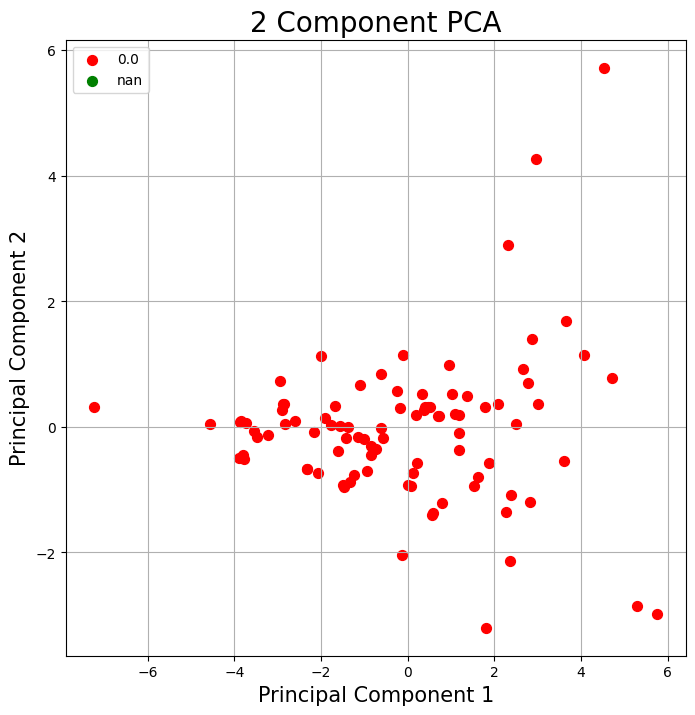

In [9]:
# Menambahkan kolom target (misalnya 'partition')
finalDf = pd.concat([principalDf, pdf[['partition']]], axis=1)

# Visualisasi hasil PCA
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 Component PCA', fontsize=20)

# Visualisasi berdasarkan cluster (partition)
targets = finalDf['partition'].unique()
colors = ['r', 'g', 'b', 'y', 'c', 'm']

for target, color in zip(targets, colors):
    indicesToKeep = finalDf['partition'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Principal Component 1'],
               finalDf.loc[indicesToKeep, 'Principal Component 2'],
               c=color, s=50)
ax.legend(targets)
ax.grid()
plt.show()



Pada bagian kode ini, pertama-tama kolom 'partition' (yang bisa berisi label atau kategori cluster) ditambahkan ke DataFrame principalDf menggunakan fungsi pd.concat(). Kolom ini menghubungkan hasil PCA dengan informasi kategori (misalnya, hasil clustering) yang akan digunakan untuk visualisasi. Selanjutnya, visualisasi dilakukan dengan membuat plot sebar (scatter plot) menggunakan matplotlib. Sumbu x dan y masing-masing mewakili Principal Component 1 dan Principal Component 2, yang merupakan dua komponen utama hasil dari PCA. Setiap titik dalam plot merepresentasikan satu data point, dan warnanya ditentukan berdasarkan kategori yang ada di kolom 'partition'. Dengan cara ini, kita bisa melihat bagaimana data terdistribusi dalam dua dimensi baru dan apakah ada pemisahan yang jelas antar cluster. Setiap kategori (target) dipetakan ke warna yang berbeda untuk membedakan grup-grup yang berbeda. Legenda ditambahkan untuk mempermudah interpretasi, dan grid pada plot memberikan kemudahan dalam membaca posisi data. Akhirnya, grafik ditampilkan dengan plt.show().


Visualisasi PCA yang Anda tampilkan memberikan gambaran awal tentang struktur data Anda. Titik-titik data yang tersebar merata tanpa membentuk kelompok yang jelas mengindikasikan bahwa berdasarkan dua komponen utama yang dipilih, tidak ada pemisahan yang signifikan dalam data. Namun, interpretasi ini perlu diperdalam dengan mempertimbangkan beberapa faktor: Pertama, jumlah komponen utama yang digunakan dapat mempengaruhi hasil. Kedua, skala data yang berbeda dapat memengaruhi interpretasi. Terakhir, untuk memahami makna dari setiap komponen utama, kita perlu melihat kontribusi dari masing-masing variabel asli terhadap komponen tersebut. Secara keseluruhan, visualisasi ini memberikan gambaran awal, tetapi analisis lebih lanjut diperlukan untuk mendapatkan pemahaman yang komprehensif tentang data Anda.

In [10]:
# Menampilkan rasio variansi yang dijelaskan oleh setiap komponen
print('Explained Variance Ratio:')
print(pca.explained_variance_ratio_)

# Total variansi yang dijelaskan oleh 2 komponen utama
print('Total Explained Variance by 2 Components: %.2f' % sum(pca.explained_variance_ratio_))


Explained Variance Ratio:
[0.64006383 0.17880374]
Total Explained Variance by 2 Components: 0.82


Hasil analisis PCA menunjukkan rasio variansi yang dijelaskan oleh dua komponen utama yang dihasilkan dari dataset. Komponen pertama menjelaskan sekitar 64.01% dari total variansi, sedangkan komponen kedua menjelaskan sekitar 17.88%. Secara keseluruhan, kedua komponen ini menjelaskan sekitar 82% dari total variansi dalam data. Ini menunjukkan bahwa dua komponen utama tersebut mampu menangkap sebagian besar informasi yang terkandung dalam dataset, sehingga dapat digunakan untuk analisis lebih lanjut dan visualisasi tanpa kehilangan banyak informasi penting. Dengan demikian, penggunaan PCA dalam konteks ini efektif untuk mereduksi dimensi data sambil tetap mempertahankan struktur informasi yang signifikan.

Pada tugas ini, kita telah melakukan analisis data menggunakan Principal Component Analysis (PCA) untuk dataset cars_clus.csv. Langkah pertama yang dilakukan adalah menangani missing values dalam dataset dengan mengganti nilai "$null$" menjadi NaN, kemudian menghapus baris yang mengandung nilai yang hilang. Setelah itu, fitur numerik yang relevan dipilih untuk analisis PCA, dan data tersebut distandarisasi menggunakan StandardScaler agar memiliki rata-rata 0 dan variansi 1. Dengan standarisasi ini, kita memastikan bahwa setiap fitur memiliki bobot yang sama dalam analisis PCA, tanpa ada fitur yang mendominasi karena skala yang berbeda.

Selanjutnya, PCA diterapkan untuk mengurangi dimensi data menjadi dua komponen utama, yang memungkinkan kita untuk memvisualisasikan data dalam dua dimensi. Visualisasi hasil PCA menunjukkan bagaimana data terdistribusi dalam ruang komponen utama, serta bagaimana masing-masing kategori dalam kolom 'partition' (yang mewakili cluster atau label) tersebar di ruang tersebut. Hal ini memberikan wawasan tentang pemisahan antar kategori dan pola yang mungkin ada dalam data.

Dari hasil analisis, kita juga dapat melihat rasio variansi yang dijelaskan oleh setiap komponen utama. Dengan dua komponen utama, kita bisa mengamati seberapa besar kontribusi setiap komponen dalam menjelaskan variabilitas data. Dengan demikian, tugas ini menunjukkan bagaimana PCA dapat digunakan untuk mereduksi dimensi data, memudahkan visualisasi, dan memberikan pemahaman lebih baik mengenai struktur data yang ada.